In [1]:
%pylab inline

import json

import sys

from vocalsims.reed_up_downstream_dyn import ReedSimulation
from simulation_harmonic_transient_analyser import do_analysis
from run_tongue_vt_simulation_randomiser import simulate_js, collect_time_domain

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import zipfile
import random
import warnings
import os
from glob import glob
import re
from vocalsims.interfacing.json_object import JSONObject

def regex_files(dirname, regex):
    for f in os.listdir(dirname):
        if re.search(regex, f):
            yield os.path.join(dirname,f)

def js_from_dir(dirname, n=None):
    #fl = glob(os.path.join(dirname,'*.json'))
    fl = [x for x in regex_files(dirname, r'(?<!init)\.json$')]
    if n is not None:
        fl = random.sample(fl,n)
    for ii,filename in enumerate(fl):
        try:
            with open(filename) as file:
                jj = JSONObject(json.load(file))
                jj['filename'] = filename
                flatjs = {'.'.join(str(y) for y in x[0]):x[1] for x in jj.iter_tree()} 
                yield flatjs
        except (json.JSONDecodeError, TypeError):
            warnings.warn('JSON  decode error in file '+str(file))

In [3]:
#zipf = '/home/goios/Data/Simulations/clarinet_attack_random/jsonsims.zip'
#dirname = '/Users/goios/Data/Simulations/clarinet_attack_random/json_outputs_p3/'
dirname = '/Users/goios/Data/Simulations/clarinet_attack_random/test/'

In [4]:
jo=[x for x in js_from_dir(dirname)]

In [5]:
import pandas
#flatjs=[{'.'.join(str(y) for y in x[0]):x[1] for x in jo[ii].iter_tree()} for ii in range(len(jo))]
df = pandas.DataFrame(jo)


In [6]:
df['transient_duration'] = df['analysis.t_trans_end'] - df['analysis.t_trans_start']
df1=df.loc[:,[len(df[cc].unique())>1 for cc in df.columns]]
#[cc for cc in df1.columns]

<AxesSubplot:ylabel='Frequency'>

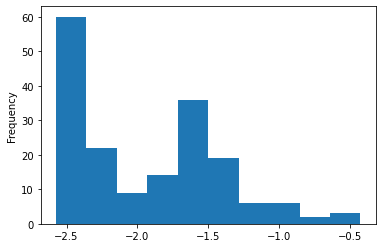

In [7]:
import numpy as np
np.log10(df1.transient_duration).plot.hist()

<AxesSubplot:xlabel='transient_duration', ylabel='analysis.hrat1_abs_trans'>

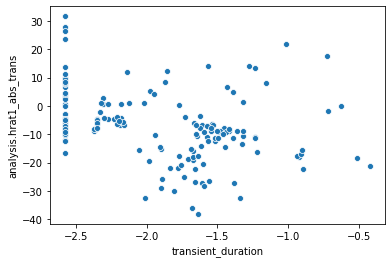

In [8]:
import seaborn as sns
sns.scatterplot(x=np.log10(df1.transient_duration),y=df1['analysis.hrat1_abs_trans'])

<AxesSubplot:xlabel='analysis.zb_0_f', ylabel='simulation.params.tracts.bore.elements.0.length'>

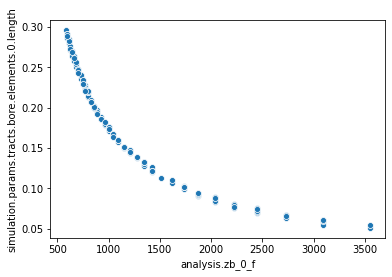

In [9]:
sns.scatterplot(df1['analysis.zb_0_f'],df1['simulation.params.tracts.bore.elements.0.length'])

<AxesSubplot:xlabel='analysis.zb_0_f', ylabel='analysis.zb_0_z'>

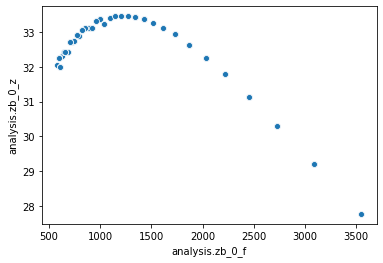

In [10]:
sns.scatterplot(df1['analysis.zb_0_f'],df1['analysis.zb_0_z'])

<AxesSubplot:xlabel='transient_duration'>

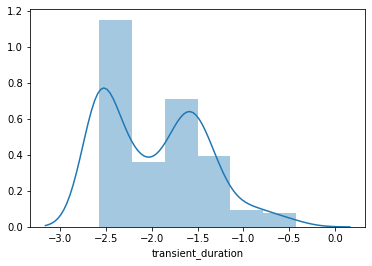

In [11]:
sns.distplot(np.log10(df1['transient_duration']))

<AxesSubplot:xlabel='analysis.hb1_abs_sus'>

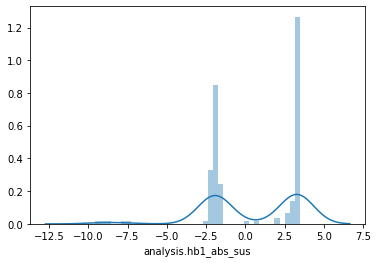

In [12]:
sns.distplot(np.log10(df1['analysis.hb1_abs_sus']),bins=40)

In [13]:
df2 = df1[(df1['analysis.hb1_abs_sus']>100)&(df1['transient_duration']>0.01)]
len(df2)

81

<AxesSubplot:>

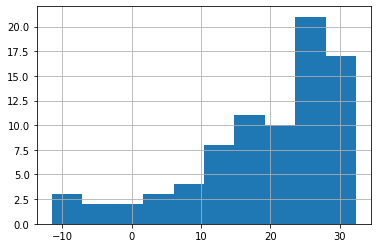

In [14]:
df2['analysis.zv_0_z'].hist()

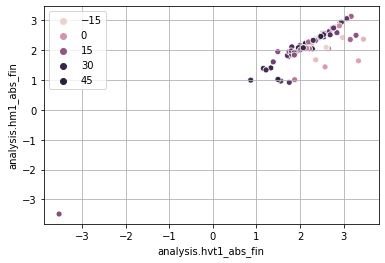

In [15]:
import seaborn as sns
#df2 = df1#.sample(200)
ax=sns.scatterplot(data=df2,x=np.log10(df2['analysis.hvt1_abs_fin']),y=np.log10(df2['analysis.hm1_abs_fin']),hue=np.array(df2['analysis.zv_0_z']))
#ax.set_xlim(0,4)
#ax.set_ylim(0,4)
ax.grid()

/Users/goios/Envs/unsw/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


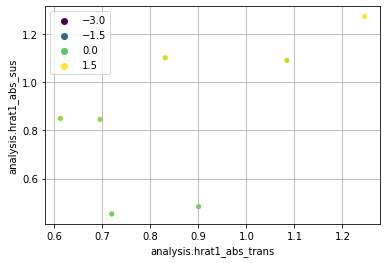

In [16]:
ax=sns.scatterplot(data=df2,x=np.log10(df2['analysis.hrat1_abs_trans']),y=np.log10(df2['analysis.hrat1_abs_sus']),hue=np.log10(df2['analysis.hvt1_abs_sus']/df2['analysis.hb1_abs_sus']),palette='viridis')
ax.grid()


/Users/goios/Envs/unsw/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


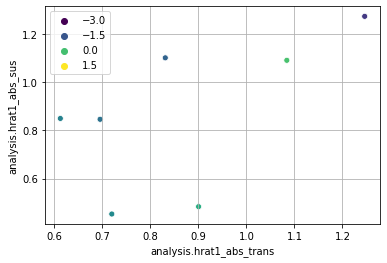

In [17]:
ax=sns.scatterplot(data=df2,x=np.log10(df2['analysis.hrat1_abs_trans']),y=np.log10(df2['analysis.hrat1_abs_sus']),hue=np.log10(df2['analysis.hvt3_abs_sus']/df2['analysis.hvt1_abs_sus']),palette='viridis')
ax.grid()


/Users/goios/Envs/unsw/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


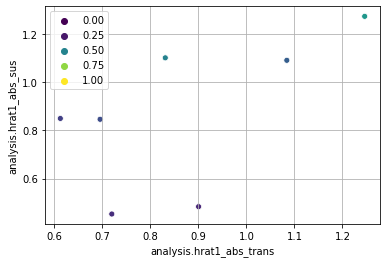

In [18]:
ax=sns.scatterplot(data=df2,x=np.log10(df2['analysis.hrat1_abs_trans']),y=np.log10(df2['analysis.hrat1_abs_sus']),hue=np.log10(df2['analysis.final amplitude']/df2['analysis.hb1_abs_sus']),palette='viridis')
ax.grid()


In [19]:
df3=df2[(df2['analysis.hrat1_abs_trans']>1)&
        (df2['analysis.hrat1_abs_trans']/df2['analysis.hrat1_abs_sus']>2)&
        (df2['analysis.final amplitude']/df2['analysis.hb1_abs_sus']<4)]
df3

,simulation.start,simulation.params.description,simulation.params.version,simulation.params.simulation.__sample rate,simulation.params.simulation.sample rate,simulation.params.simulation.duration,simulation.params.simulation.callback every,simulation.params.environment.acoustic._prefer,simulation.params.environment.acoustic.speed of sound,simulation.params.environment.acoustic.density,...,tracts.bore.description,tracts.bore.frequency independent losses,tracts.bore.elements.0.type,tracts.bore.elements.0.length,tracts.bore.elements.0.radius,tracts.bore.elements.0.loss multiplier,tracts.bore.elements.1.type,tracts.bore.elements.1.kind,tracts.vocal.elements.0.output radius,transient_duration
168,20200825_180601,a clarinet with vocal tract and ranges for par...,20200805,192000.0,48000.0,0.6,1024.0,True,346.749201,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069871


In [20]:
df3r = df3.sample().iloc[0]
print (df3r.name, df3r.filename.split('/')[-1])

df.loc[df3r.name]

168 tongue_vt_open_tuning_20200825_180601.json


simulation.start                                                                20200825_180601
simulation.params.description                 a clarinet with vocal tract and ranges for par...
simulation.params.version                                                              20200805
simulation.params.simulation.__sample rate                                               192000
simulation.params.simulation.sample rate                                                  48000
                                                                    ...                        
tracts.bore.elements.0.loss multiplier                                                      NaN
tracts.bore.elements.1.type                                                                 NaN
tracts.bore.elements.1.kind                                                                 NaN
tracts.vocal.elements.0.output radius                                                       NaN
transient_duration                      

In [21]:
df3r[['simulation.start','transient_duration','analysis.f0','analysis.final amplitude', 'analysis.hb1_abs_sus','analysis.hb1_abs_trans']]

simulation.start            20200825_180601
transient_duration                0.0698712
analysis.f0                         978.533
analysis.final amplitude            2942.77
analysis.hb1_abs_sus                1548.53
analysis.hb1_abs_trans              744.506
Name: 168, dtype: object

In [22]:
fn=jo[df3r.name]['filename']
fn

'/Users/goios/Data/Simulations/clarinet_attack_random/test/tongue_vt_open_tuning_20200825_180601.json'

In [23]:
with open(fn) as jsf:
    js = jsf.readlines()[0]
        
print(json.loads(js)['simulation']['start'])


20200825_180601


In [24]:

def run_smooth_pert(js):
    sim = ReedSimulation()
    sim.from_json(js)
    sim.set_probe('vocal', -1, 0, label='m')

    sr=sim.sr
    dp_per_samp = 1.0
    n_samp=int(js['simulation/duration']*sr)
    frac = dp_per_samp/js['environment/blowing pressure/value']

    pert_pressure = js['perturbation/blowing pressure']
    pert_ampl = js['perturbation/factor']

    sim.simulation_init(pert=False)
    sim.p_blow=0.0
    sim.pert=False
    p_blow = []

    f0=1/(sim.tracts['bore'].total_delay/sim.sr*2)

    pert_duration = 1/f0/2

    pert_started = False
    pert_finished = False
    pert_t_on = -1.
    pert_t_off = -1.

    while sim.samp_no < n_samp:
        sim.simulation_tick(reverse=False)
        cur_t = sim.samp_no/sr
        if sim.p_blow<pert_pressure:
            sim.p_blow+=(js['environment/blowing pressure/value']-sim.p_blow)*frac
        else:
            if pert_ampl and not pert_started:
                pert_started=True
                pert_samp_on = sim.samp_no
                pert_delta_a = sim.a0*(pert_ampl-1)
                pert_a_start = sim.a0
                pert_t_on = cur_t
        if pert_started and not pert_finished:
            delta_t = cur_t - pert_t_on
            sim.a0 = pert_a_start+(1-np.cos(np.pi*delta_t/pert_duration))/2*pert_delta_a
            if delta_t>pert_duration:
                pert_finished=True
                pert_samp_off = sim.samp_no
                pert_t_off = cur_t

        for probe in sim.probes:
            sim.update_probe(probe)
                
        p_blow.append(sim.p_blow)
        
    sim.p_blow_vec = np.array(p_blow)
    sim.pert_t_on = pert_t_on
    sim.pert_time = pert_t_on
    sim.pert_t_off = pert_t_off
    sim.finalize()
    return sim


In [25]:
sim = run_smooth_pert(JSONObject(js)["simulation/params"])



No radiation filter


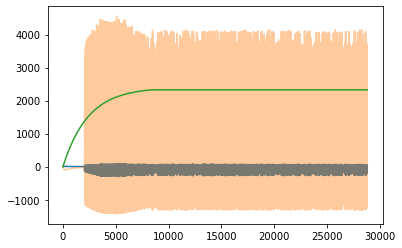

In [26]:
figure()
plot(sim.p_in+sim.p_out)
plot(sim.p_vt_in+sim.p_vt_out,alpha=.4)
plot(sim.p_blow_vec)
#xlim(3000,5000)
#ylim(-4000,4000)

In [27]:
import json
data = collect_time_domain(sim)
data.update({'js':json.loads(js)['simulation']['params']})

In [30]:
res=do_analysis(data,impedance=False)

In [39]:
row=df.loc[(np.abs(df['analysis.f0']-res['f0'])).argmin()]

In [41]:
row[df.columns.str.contains('analysis.')]

analysis.pert_time               0.071
analysis.initial amplitude     1172.43
analysis.final amplitude       3499.44
analysis.f0                    1330.11
analysis.hb1_t_min            0.025125
                                ...   
analysis.zb_3_f                19810.5
analysis.zb_3_z                6.95133
analysis.zb_4_f                25669.9
analysis.zb_4_z                4.75062
analysis.error                     NaN
Name: 63, Length: 184, dtype: object

In [42]:
res

{'pert_time': 0.17383333333333334,
 'initial amplitude': 228.19000717408468,
 'final amplitude': 348.491046881314,
 'f0': 1334.839614277946,
 'hb1_t_min': 0.03577083333333331,
 'hb1_t_max': 0.10510416666666658,
 'hb1_abs_min': 0.006161413573751883,
 'hb1_abs_max': 74.53141078016785,
 'hb1_abs_fin': 47.045924531965596,
 'hb1_abs_pert': 55.403931664533715,
 'hb2_t_min': 0.03843749999999997,
 'hb2_t_max': 0.11043749999999991,
 'hb2_abs_min': 0.0011959635138208498,
 'hb2_abs_max': 39.55436956657506,
 'hb2_abs_fin': 22.384308273658316,
 'hb2_abs_pert': 30.000192903279796,
 'hb3_t_min': 0.03843749999999997,
 'hb3_t_max': 0.12110416666666657,
 'hb3_abs_min': 0.0005031691377690904,
 'hb3_abs_max': 38.7043924382367,
 'hb3_abs_fin': 22.05148036926742,
 'hb3_abs_pert': 31.66550102039819,
 'hb4_t_min': 0.03843749999999997,
 'hb4_t_max': 0.10777083333333325,
 'hb4_abs_min': 0.00027154027025914267,
 'hb4_abs_max': 38.55057101444266,
 'hb4_abs_fin': 18.59731856161345,
 'hb4_abs_pert': 29.089335220885

In [43]:
np.save?

Signature: np.save(file, arr, allow_pickle=True, fix_imports=True)
Docstring:
Save an array to a binary file in NumPy ``.npy`` format.

Parameters
----------
file : file, str, or pathlib.Path
    File or filename to which the data is saved.  If file is a file-object,
    then the filename is unchanged.  If file is a string or Path, a ``.npy``
    extension will be appended to the filename if it does not already
    have one.
arr : array_like
    Array data to be saved.
allow_pickle : bool, optional
    Allow saving object arrays using Python pickles. Reasons for disallowing
    pickles include security (loading pickled data can execute arbitrary
    code) and portability (pickled objects may not be loadable on different
    Python installations, for example if the stored objects require libraries
    that are not available, and not all pickled data is compatible between
    Python 2 and Python 3).
    Default: True
fix_imports : bool, optional
    Only useful in forcing objects in obje